#Imports 

In [ ]:
!nvidia-smi

Sat Aug  8 07:32:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install torch==1.5.1+cu92 torchvision==0.6.1+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 604.8MB 22kB/s 
     |████████████████████████████████| 6.5MB 42.6MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
import torch
from IPython.display import Image, clear_output 

print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1+cu92 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=0aee65877724aa6881c3b5c03b4317911bb624ac80983a45a92b5e9b81741ed0
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
from zipfile import ZipFile
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import io
from itertools import groupby
import cv2
from tqdm.auto import tqdm
from pathlib import Path
from time import time
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import random_split
from PIL import Image
import torchvision.transforms as T
import os
import torch
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


time: 1.06 s


# Data Preparation

In [ ]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
time: 16.6 s


In [ ]:
classes =  [ 'flying_bird', 'large_drone', 'small_drone','winged_drone' ]
dataFolder = '/content/Dataset'
zipFilePath = '/content/drive/My Drive/e4p2/dataset_final.zip'

time: 2.71 ms


In [ ]:
from zipfile import ZipFile

def extract_images(zipfilename, targetfolder):
  
  zipObj = ZipFile(zipfilename, 'r')
  #print("zipObj " +zipObj)
  zipObj.extractall(targetfolder)
  zipObj.close()

time: 2.64 ms


In [ ]:
extract_images("/content/drive/My Drive/e4p2/dataset_final.zip","/content")

time: 27.5 s


In [ ]:
import os,glob,gc

gc.enable()
from zipfile import ZipFile

homepath = '/content/'
dataset  = os.path.join(homepath,'Dataset')

os.chdir(homepath)

time: 3.17 ms


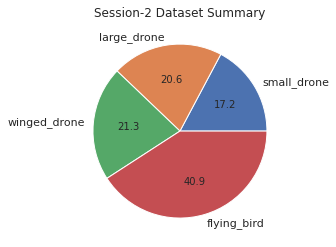

time: 4.97 s


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

dspth = dataset.split('.zip')[0]
plt.pie( 
        list(map(lambda f : len(os.listdir(os.path.join(dspth,f))), os.listdir(dspth))),
        labels = os.listdir(dspth) ,
        autopct='%0.1f')

plt.title('Session-2 Dataset Summary')
plt.show()

In [ ]:
import numpy as np

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

time: 1.24 ms


In [ ]:
import matplotlib.pyplot as plt 

flying_birds = len(os.listdir(dataFolder + '/' + classes[0]))

"large_copters = len(os.listdir(dataFolder + '/' + classes[1]))\nsmall_copters = len(os.listdir(dataFolder + '/' + classes[2]))\ndrone = len(os.listdir(dataFolder + '/' + classes[3]))\n\ncategorical_count_arr =  [flying_birds, large_copters, small_copters, drone]\n\nsizes = np.array(categorical_count_arr)\n\n#pie plot \nplt.pie(categorical_count_arr, labels=classes, autopct=absolute_value) \nplt.title('Dataset split') \n# plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_8.png',dpi=300,bbox_inches='tight') \nplt.show()\n\n#pie plot \nplt.pie([flying_birds, large_copters, small_copters, drone], labels=classes, autopct='%0.1f') \nplt.title('Dataset %') \n# plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_8.png',dpi=300,bbox_inches='tight') \nplt.show()"

time: 48.8 ms


In [ ]:
def calcMeanStd(dl):
    mean = 0.
    std = 0.
    nb_samples = 0.
    from IPython.core.debugger import set_trace

    for data,lbl in dl:
        #set_trace()
        batch_samples = data.size(0)
        data = data.view(batch_samples, data.size(1), -1)
        mean += data.mean(2).sum(0)
        std += data.std(2).sum(0)
        nb_samples += batch_samples

    mean /= nb_samples
    std /= nb_samples

    print('Mean is \t: {}\nstd is \t: {}\nnb_samples \t:{}'.format(mean,std,nb_samples))

time: 22.7 ms


In [ ]:
import torch,torchvision

trans_form = torchvision.transforms.Compose([torchvision.transforms.Resize([224,224]),
                                             torchvision.transforms.ToTensor()])
print("transforms done")

dataset = torchvision.datasets.ImageFolder("/content/Dataset",transform=trans_form)
dloader=torch.utils.data.DataLoader(dataset,batch_size=32,num_workers=4, pin_memory=True)
#calcMeanStd(dloader)

transforms done
time: 61.2 ms


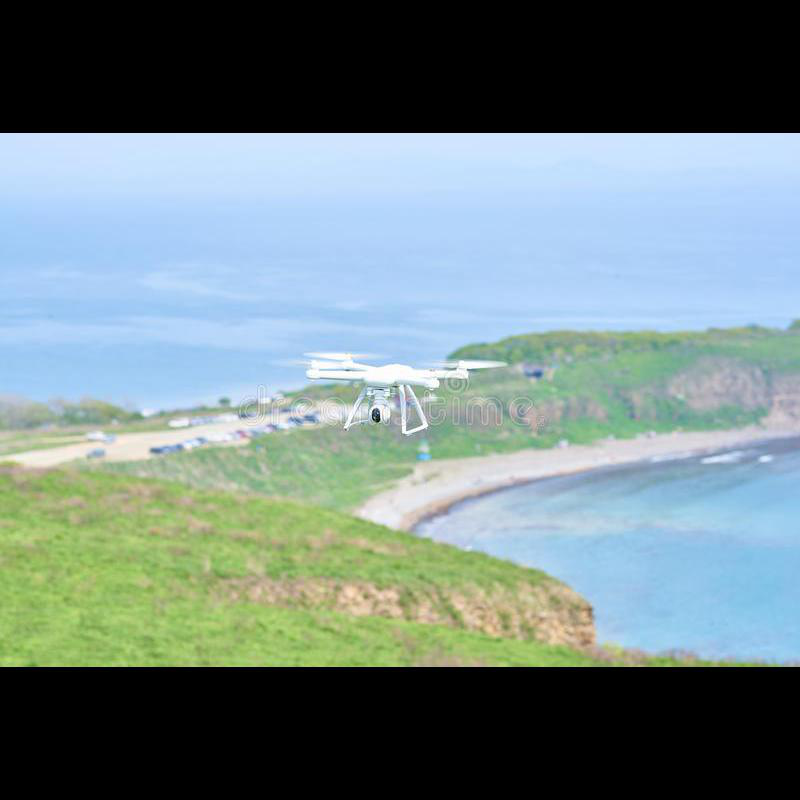

time: 161 ms


In [ ]:
from PIL import Image

Image.open("/content/Dataset/small_drone/small_drone_1.jpg")  

#Data Preprocessing

In [ ]:
from torchvision import transforms
import albumentations as A
import albumentations.pytorch as AP
import random
import numpy as np


class Albumentations_transform:
  """
  Class to create test and train transforms using Albumentations. ToTensor() will be appended at the end of transforms list
  """
  def __init__(self, transforms_list=[]):
    transforms_list.append(AP.ToTensor())
    
    self.transforms = A.Compose(transforms_list)

  """
  Wrapper Model to convert to np array
  """
  def __call__(self, img):
    img = np.array(img)
    #print(img)
    return self.transforms(image=img)['image']

time: 610 ms


In [ ]:
import albumentations as A
channel_means  = (0.3785, 0.4150, 0.4381)
channel_stdevs = (0.2674, 0.2821, 0.3023)
# Train Phase transformations

transform = {
    "train": Albumentations_transform([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       A.Resize(224, 224),
                                       A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=1, max_h_size=56, max_w_size=56), # fillvalue is 0 after normalizing as mean is 0
                                       ]),
    "test": Albumentations_transform([A.Resize(224, 224),
                                      A.Normalize(mean=channel_means, std=channel_stdevs),])
              
}

fillmeans = (np.array(channel_means)).astype(np.uint8)

time: 10.3 ms


In [ ]:
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
def load_data(imageFolder):
  dataset = torchvision.datasets.ImageFolder(imageFolder,transform=transform['train'])
  print(dataset.classes)

  # print(dataset.targets)
  def get_subset(indices, start, end):
      return indices[start : start + end]

  SEED = 1

  # CUDA?
  cuda = torch.cuda.is_available()
  print("CUDA Available?", cuda)

  # For reproducibility
  torch.manual_seed(SEED)

  if cuda:
      torch.cuda.manual_seed(SEED)

  TRAIN_PCT, TEST_PCT = 0.7, 0.3  
  train_count = int(len(dataset) * TRAIN_PCT)
  test_count = int(len(dataset) * TEST_PCT)

  indices = torch.randperm(len(dataset))


  train_idx = get_subset(indices, 0, train_count)
  print(len(train_idx))
  test_idx = get_subset(indices, train_count, len(dataset))
  trainloader=torch.utils.data.DataLoader(dataset,batch_size=32,num_workers=4, pin_memory=True,sampler=SubsetRandomSampler(train_idx))
  testloader=  torch.utils.data.DataLoader(dataset,batch_size=32,num_workers=4, pin_memory=True,sampler=SubsetRandomSampler(test_idx))
  return trainloader, testloader, dataset

time: 19 ms


In [ ]:
train_loader, val_loader, dataset=load_data('/content/Dataset')

['flying_bird', 'large_drone', 'small_drone', 'winged_drone']
CUDA Available? True
13386
time: 124 ms


In [ ]:
import torchvision
from matplotlib import pyplot as plt

def show(imgs,lbls=None, figsize=(100,100), *args, **kwargs):
    grid_tensor = torchvision.utils.make_grid(imgs[:8], *args, **kwargs)
    grid_image = grid_tensor.permute(1,2,0)
    plt.figtext(100,100,'Images')
    plt.figure(figsize=figsize)
    plt.imshow(grid_image)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    if lbls is not None:
        print(' '.join('%22s' % [lbls[j]] for j in range(10)))
    plt.close()

time: 9.16 ms


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

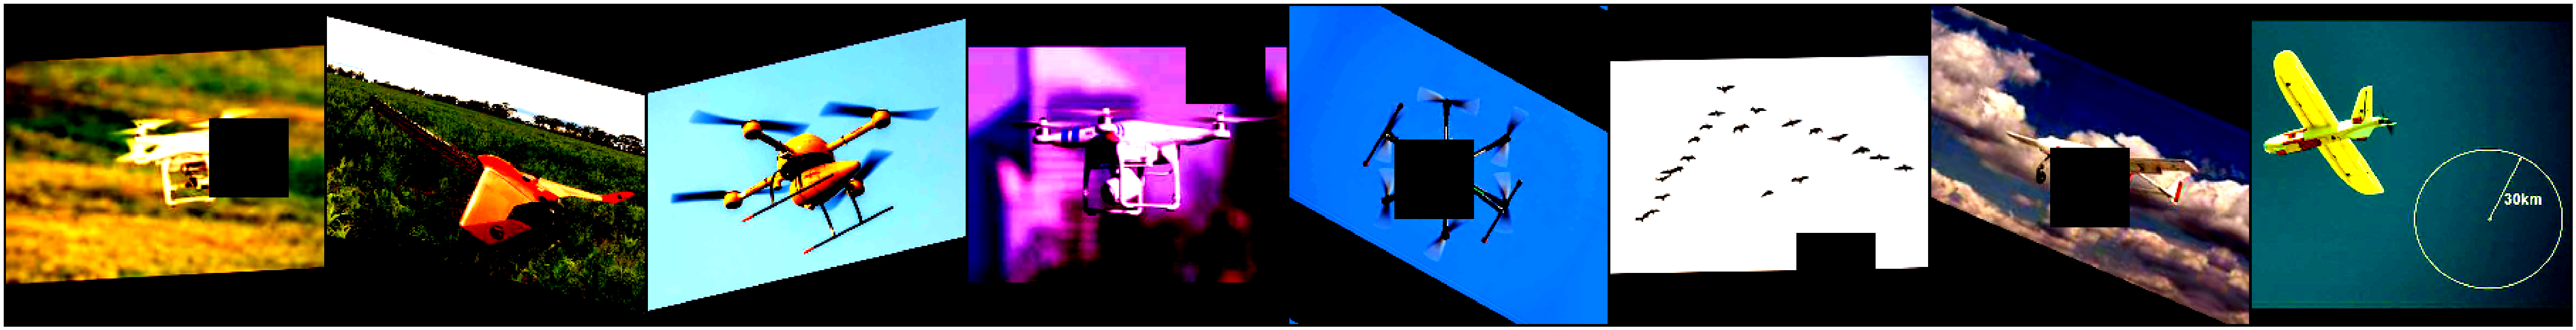

           [tensor(2)]            [tensor(3)]            [tensor(1)]            [tensor(2)]            [tensor(1)]            [tensor(0)]            [tensor(3)]            [tensor(3)]            [tensor(0)]            [tensor(3)]
time: 12.8 s


In [ ]:
import numpy as np
image, label = next(iter(train_loader))
show(image,label)

#Model Creation

In [ ]:
!pip install torchsummary
from torchsummary import summary
model = torch.hub.load('pytorch/vision:v0.6.0','mobilenet_v2',pretrained=True)
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
summary(model, input_size=(3, 224, 224))

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96

In [ ]:
for param in model.parameters():
    param.requires_grad = False    

n_inputs = model.classifier[1].in_features

model.classifier = torch.nn.Sequential(torch.nn.Linear(n_inputs, 512),
                            torch.nn.Linear(512, 4),
                            torch.nn.LogSoftmax(dim=1))

time: 9.07 ms


In [ ]:
model.to(model.device)

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

time: 11.2 ms


# Params and Early Stopping

In [ ]:
from torch.optim.lr_scheduler import StepLR

learning_rate = 0.03
momentum = 0.9
L2_factor = 0.0001

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=learning_rate,
    momentum=momentum,
    nesterov=True,
    weight_decay=L2_factor) 

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=4,
    verbose=True, 
    threshold=0.0001,
    threshold_mode='abs',
    cooldown=0, 
    min_lr=1e-8,
    eps=1e-08
)

time: 9.16 ms


In [ ]:
class EarlyStoppingOnAcc:
    def __init__(self, patience=7, mode="max", delta=0.0001, model_path='checkpoint.pt'):
        self.patience = patience
        self.counter = 0
        self.mode = mode
        self.best_score = None
        self.early_stop = False
        self.delta = delta
        self.model_path = model_path
        if self.mode == "min":
            self.val_score = np.Inf
        else:
            self.val_score = -np.Inf

    def __call__(self, epoch_score, model, model_path):
        if self.mode == "min":
            score = -1.0 * epoch_score
        else:
            score = np.copy(epoch_score)

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(epoch_score, model, model_path)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(
                "EarlyStopping counter: {} out of {}".format(
                    self.counter, self.patience
                )
            )
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(epoch_score, model, model_path)
            self.counter = 0

    def save_checkpoint(self, epoch_score, model, model_path):
        if epoch_score not in [-np.inf, np.inf, -np.nan, np.nan]:
            print(
                "Validation score improved ({} --> {}). Saving model!".format(
                    self.val_score, epoch_score
                )
            )
            torch.save(model.state_dict(), model_path)
            traced_model = torch.jit.trace(model.float(), torch.randn(1,3,224,224).to(device))
            torch.jit.save(traced_model, 'modelnet_v2_2.pt')
            # traced_model.save('modelnet_v2_44_77.pt')
            torch.save(model, 'model.pt')
        self.val_score = epoch_score

time: 26.8 ms


In [ ]:

from torch.autograd import Variable
from tqdm import tqdm

def train_model(model, batch_size, patience, n_epochs):
    
    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = [] 
    
    # initialize the early_stopping object
    # early_stopping = EarlyStopping(patience=patience, verbose=True)
    early_stopping = EarlyStoppingOnAcc(patience=patience)
    
    for epoch in tqdm(range(1, n_epochs + 1)):
        for param_group in optimizer.param_groups:
          lr = param_group["lr"]
          print(f'\n **** learning rate: {lr}')
        ###################
        # train the model #
        ###################
        model.train() # prep model for training
        for inputs, target in train_loader:
            inputs, target = inputs.to(device), target.to(device)

            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(inputs)
            # calculate the loss
            loss = criterion(output, target)
            
            # loss = Variable(loss, requires_grad = True)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # record training loss
            train_losses.append(loss.item())
            
        ######################    
        # validate the model #
        ######################
        model.eval() # prep model for evaluation
        correct = 0
        total = 0
        accuracy = 0
        for inputs, target in val_loader:
            inputs, target = inputs.to(device), target.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(inputs)
            # calculate the loss
            loss = criterion(output, target)
            # record validation loss
            valid_losses.append(loss.item())

            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        
        # print training/validation statistics 
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)

        valid_accuracy = 100 * correct / total

        epoch_len = len(str(n_epochs))

        print_msg = (f'\n[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'\tvalid_loss: {valid_loss:.5f}' +
                     f'\tvalid_accuracy: {valid_accuracy:.2f}')
        
        print(print_msg)

        # Tensorboard logging
        '''tb.add_scalar('Loss - Train loss',
                            train_loss / len(train_loader),
                            epoch * len(train_loader))
            
        tb.add_scalar('Loss - Val',
                        valid_loss/len(val_loader),
                        epoch * len(val_loader))
        
        tb.add_scalar('Accuracy - Val',
                            valid_accuracy/len(val_loader),
                            epoch * len(val_loader))'''
        
        # clear lists to track next epoch
        train_losses = []
        valid_losses = []
        
        valid_accuracy = round(valid_accuracy, 2)
        scheduler.step(valid_accuracy)
        # early_stopping needs the validation loss to check if it has decresed, 
        # and if it has, it will make a checkpoint of the current model
        model_path = 'checkpoint.pt' # f'jantahackathon_v13_{valid_accuracy}.pth'
        early_stopping(valid_accuracy, model, model_path)

        if early_stopping.early_stop:
            print("Early stopping")
            if early_stopping.best_score is not None:
              print(f'Best score: {early_stopping.best_score}')
            break
        
    # load the last checkpoint with the best model
    model.load_state_dict(torch.load(model_path))

    return  model, avg_train_losses, avg_valid_losses

time: 70.4 ms


# Model Training


In [ ]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

time: 961 µs


In [ ]:
batch_size = 512
n_epochs = 10

# train_loader, test_loader, valid_loader = create_datasets(batch_size)

# early stopping patience; how long to wait after last time validation loss improved.
patience = 5

model, train_loss, valid_loss = train_model(model, batch_size, patience, n_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]


 **** learning rate: 0.03

[ 1/10] train_loss: 0.68960 	valid_loss: 0.61289	valid_accuracy: 76.89
Validation score improved (-inf --> 76.89). Saving model!


 10%|█         | 1/10 [07:49<1:10:29, 469.96s/it]


 **** learning rate: 0.03


 20%|██        | 2/10 [15:20<1:01:54, 464.27s/it]


[ 2/10] train_loss: 0.63640 	valid_loss: 0.62072	valid_accuracy: 76.37
EarlyStopping counter: 1 out of 5

 **** learning rate: 0.03


 30%|███       | 3/10 [22:55<53:50, 461.44s/it]  


[ 3/10] train_loss: 0.61625 	valid_loss: 0.64764	valid_accuracy: 75.53
EarlyStopping counter: 2 out of 5

 **** learning rate: 0.03

[ 4/10] train_loss: 0.63379 	valid_loss: 0.60212	valid_accuracy: 76.91
Validation score improved (76.89 --> 76.91). Saving model!


 40%|████      | 4/10 [30:36<46:06, 461.11s/it]


 **** learning rate: 0.03


 50%|█████     | 5/10 [38:18<38:26, 461.40s/it]


[ 5/10] train_loss: 0.61858 	valid_loss: 0.63048	valid_accuracy: 74.10
EarlyStopping counter: 1 out of 5

 **** learning rate: 0.03


 60%|██████    | 6/10 [46:08<30:55, 463.97s/it]


[ 6/10] train_loss: 0.60768 	valid_loss: 0.59403	valid_accuracy: 76.35
EarlyStopping counter: 2 out of 5

 **** learning rate: 0.03


 70%|███████   | 7/10 [53:49<23:09, 463.24s/it]


[ 7/10] train_loss: 0.60691 	valid_loss: 0.69677	valid_accuracy: 73.30
EarlyStopping counter: 3 out of 5

 **** learning rate: 0.03


 80%|████████  | 8/10 [1:01:34<15:27, 463.76s/it]


[ 8/10] train_loss: 0.62109 	valid_loss: 1.52582	valid_accuracy: 52.27
EarlyStopping counter: 4 out of 5

 **** learning rate: 0.03

[ 9/10] train_loss: 0.62245 	valid_loss: 0.54409	valid_accuracy: 78.90
Validation score improved (76.91 --> 78.9). Saving model!


 90%|█████████ | 9/10 [1:09:28<07:46, 466.90s/it]


 **** learning rate: 0.03


100%|██████████| 10/10 [1:17:15<00:00, 463.57s/it]


[10/10] train_loss: 0.60574 	valid_loss: 0.67704	valid_accuracy: 74.05
EarlyStopping counter: 1 out of 5


time: 1h 17min 16s


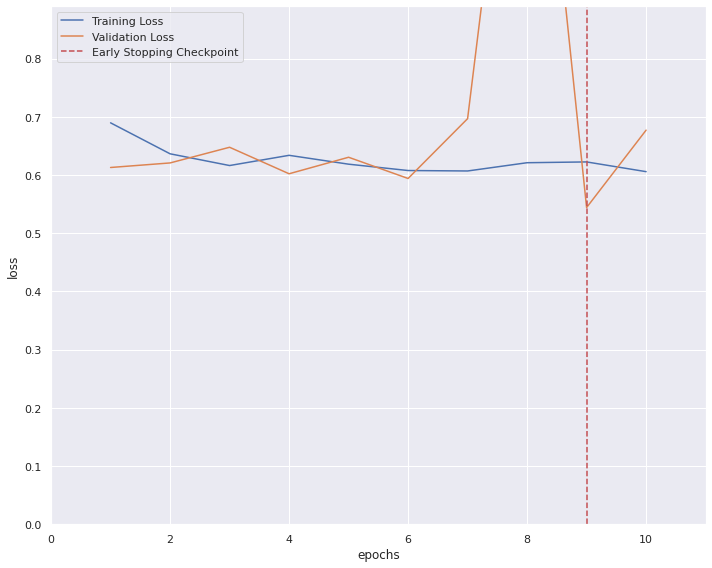

time: 688 ms


In [ ]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(valid_loss))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, max(train_loss) + 0.2) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

In [ ]:
from torchvision import transforms
test_transforms = transforms.Compose([transforms.ToTensor(),
                                      #transforms.Normalize([0.485, 0.456, 0.406],
                                      #                     [0.229, 0.224, 0.225])
                                     ])

time: 1.61 ms


In [ ]:
from torch.autograd import Variable

def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    #input = image
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

time: 4.87 ms


In [ ]:
def get_random_images(num):
    '''data = datasets.ImageFolder(data_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(dataset)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, 
                   sampler=sampler, batch_size=num)'''
    dataiter = iter(val_loader)
    images, labels = dataiter.next()
    return images, labels

time: 1.59 ms


#Save Model

In [ ]:
device

'cuda'

time: 5.31 ms


In [ ]:
model.to('cpu')

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

time: 25.9 ms


In [ ]:
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

time: 6.63 ms


In [ ]:
traced_model = torch.jit.trace(model,torch.randn(1,3,224,224))

time: 1.01 s


In [ ]:
path_model_save = f'/content/drive/My Drive/e4p2/model_net_v2_final_cpu_new.pt'

time: 772 µs


In [ ]:
traced_model.save(path_model_save)

time: 178 ms


In [ ]:
device

'cuda'

time: 2.59 ms


#Miss Classified Images

In [ ]:
def visualize_model(model, abcd, num_images=10):
    print (classes[abcd])
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig, ax = plt.subplots (2, 5, figsize = (40, 15))
    x = 0
    y = 0
    device = 'cpu'
    with torch.no_grad():
        for i, (inputs, labels)in enumerate(val_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                if labels[j] != abcd or preds[j] == labels[j]:
                    continue
                images_so_far += 1
                #ax.axis('off')
                #ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                z = inputs.cpu().data[j]
                z = z.numpy().transpose((1, 2, 0))
                z = np.clip (z, 0, 1)

                ax[y, x].axis ('off')
                ax[y, x].set_title ('pred as {}'.format(classes[preds[j]]), fontdict={'fontsize': 22, 'fontweight': 'medium'})
                ax[y, x].imshow (z)
                
                x += 1
                if x == 5:
                    y += 1
                    x = 0
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

time: 18.5 ms


large_drone


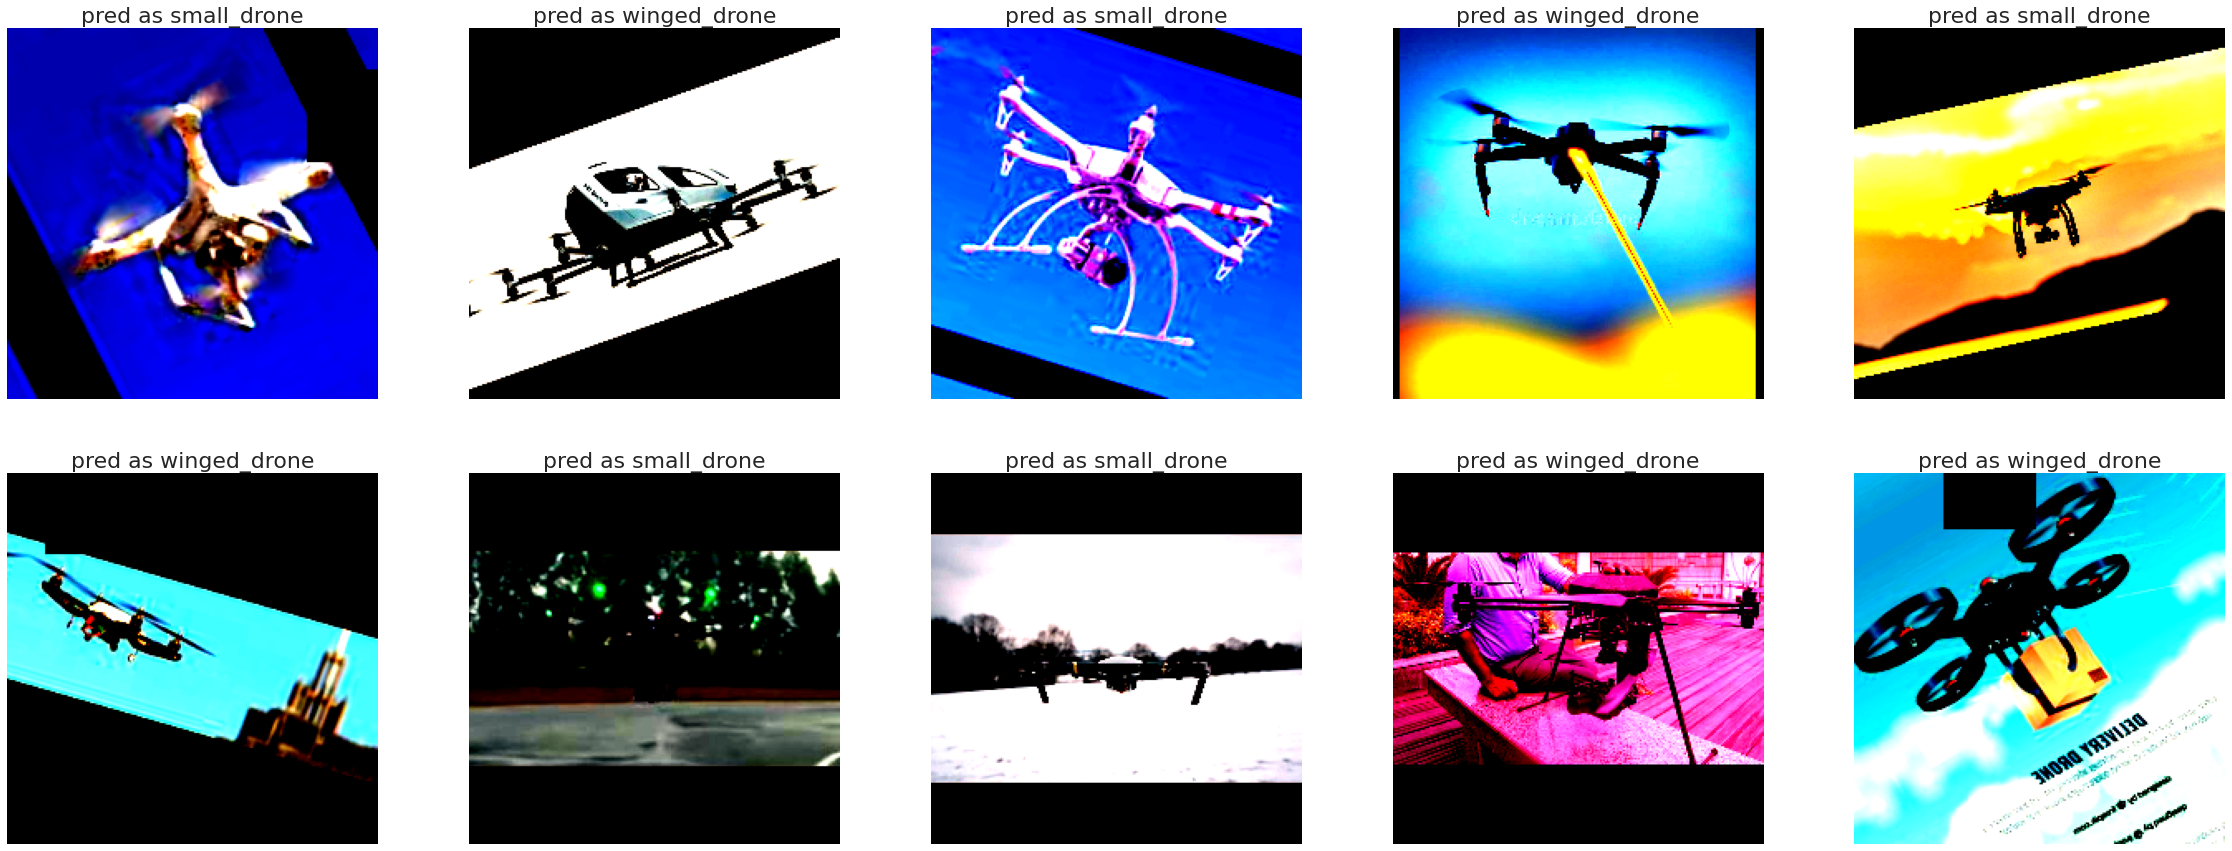

time: 11.9 s


In [ ]:
visualize_model(model,1)

flying_bird


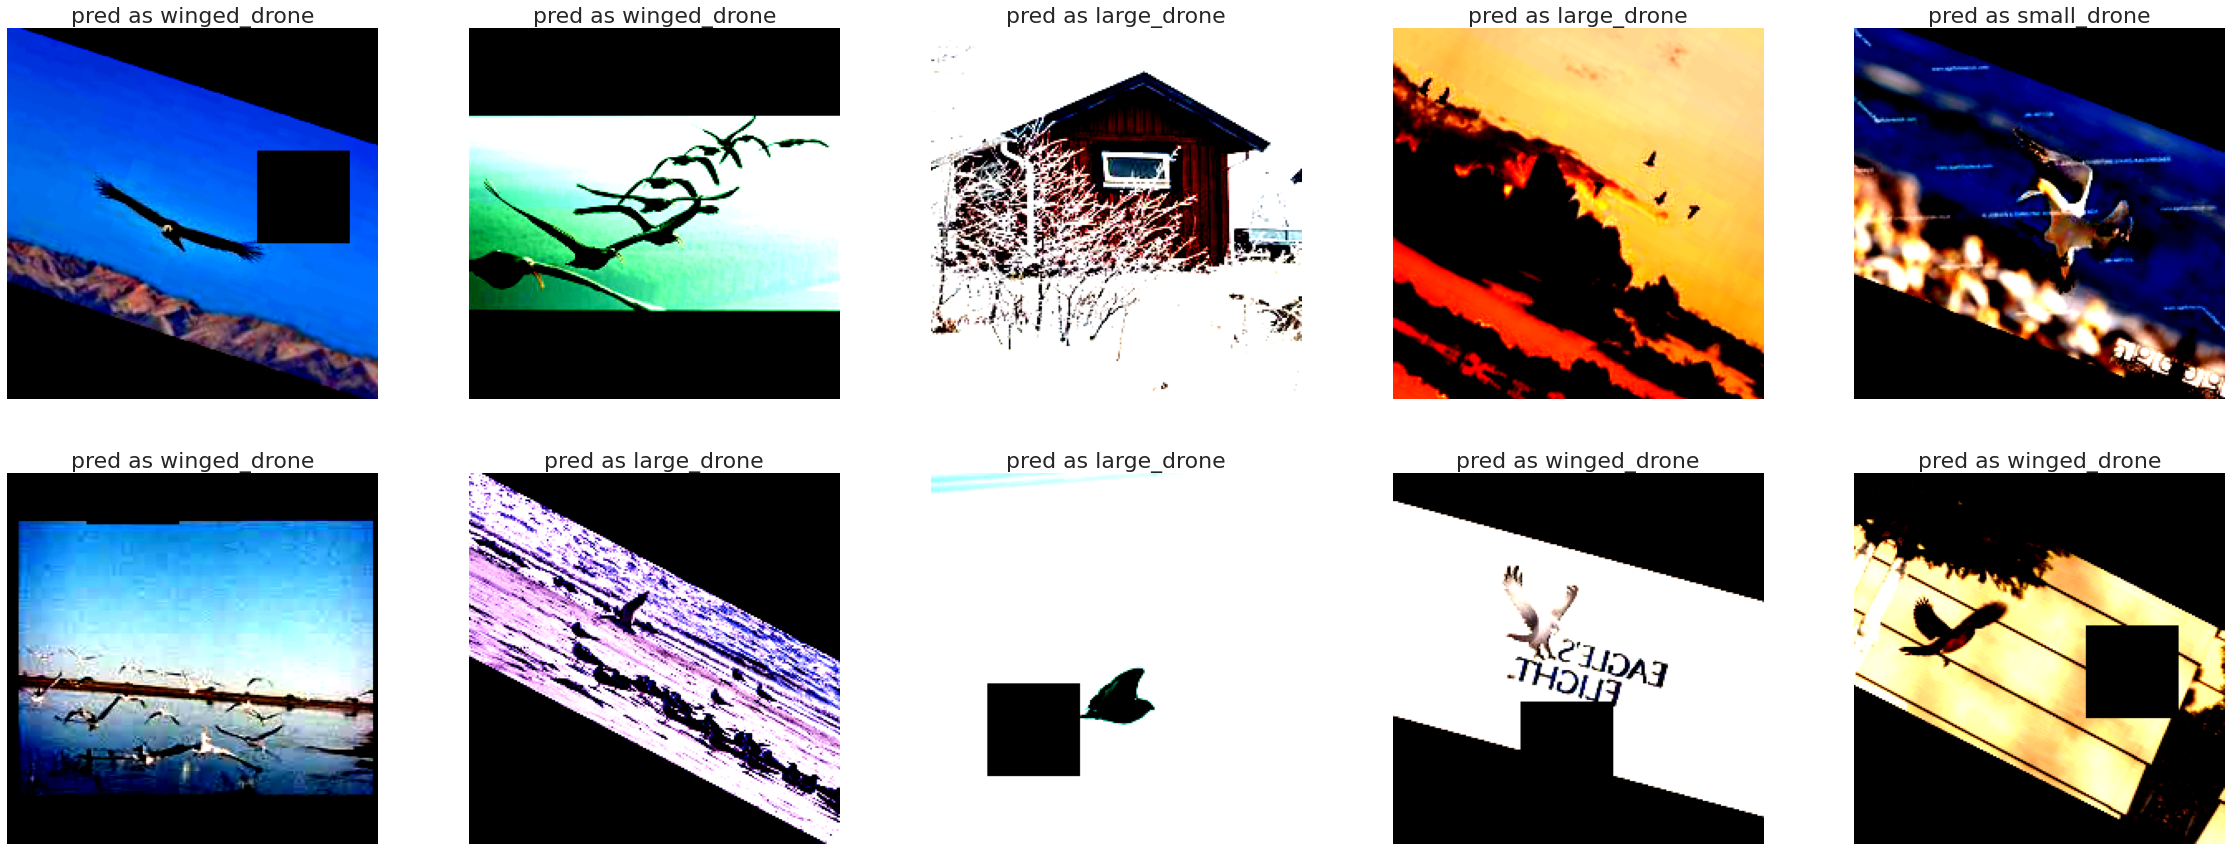

time: 34.9 s


In [ ]:
visualize_model(model,0)

small_drone


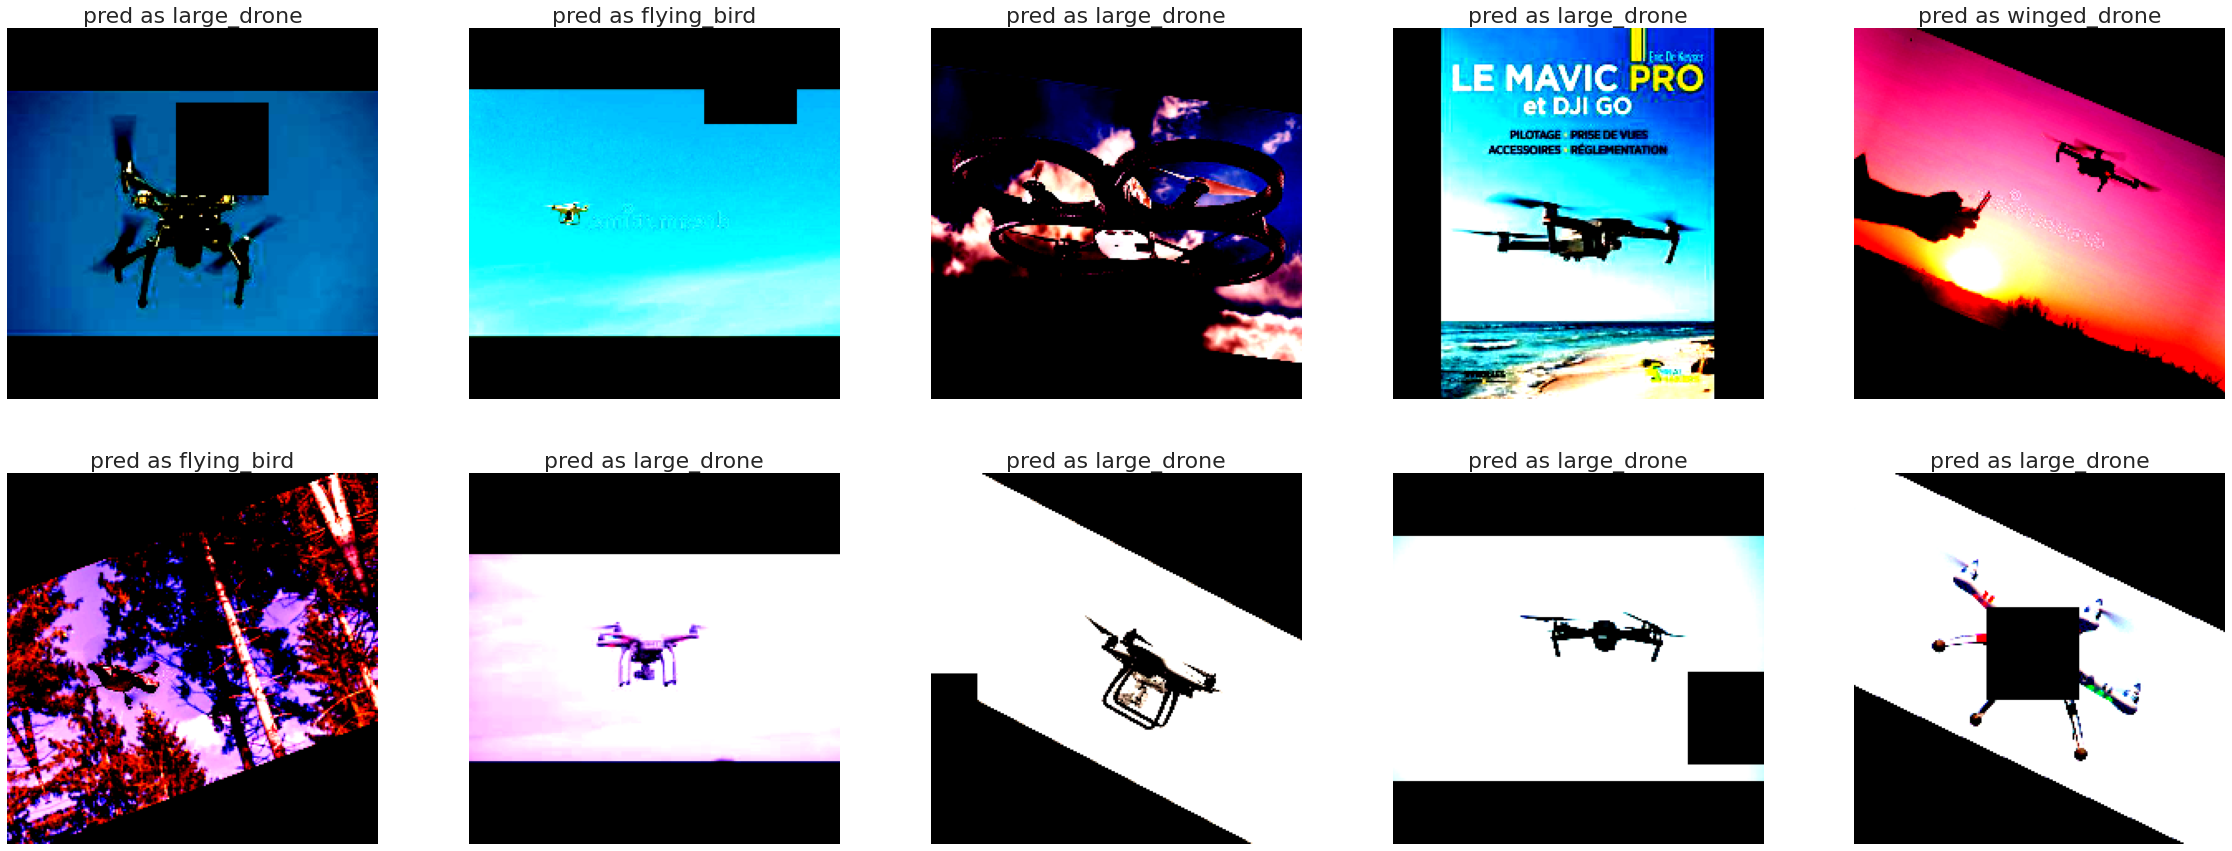

time: 15.4 s


In [ ]:
visualize_model(model,2)

winged_drone


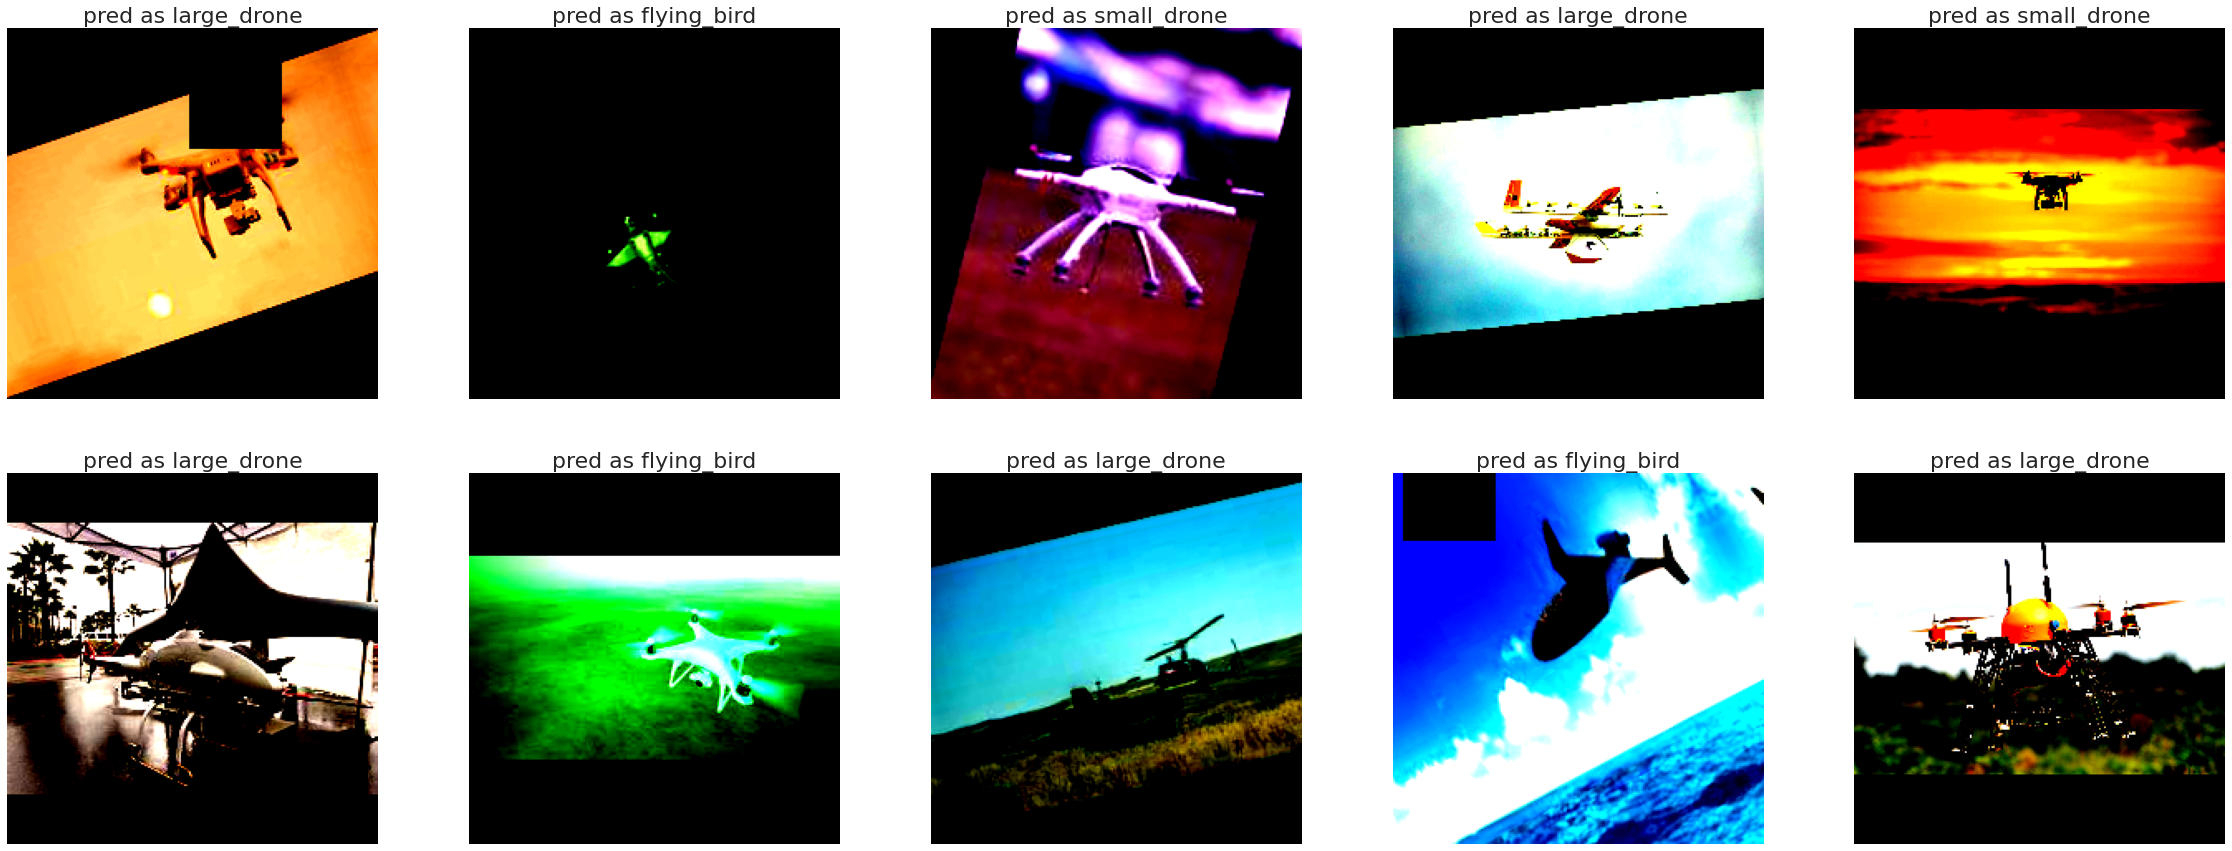

time: 34.4 s


In [ ]:
visualize_model(model,3)